In [16]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score



#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Pair Programming Ajuste
Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

    - Realizar el ajuste o ajustes de los modelos
    - Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
df_est_enc = pd.read_pickle('data/card_est_enc.pkl')
df_balanceo = pd.read_pickle('data/df_balanceo.pkl')

In [3]:
# separamos los datos en X e y

X1 = df_est_enc.drop("fraud", axis = 1)
y1 = df_est_enc["fraud"]

In [4]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 59)

In [5]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [6]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
602822,0.0,0.0,Train
486368,0.0,0.0,Train
982357,0.0,0.0,Train
158476,0.0,0.0,Train
77139,0.0,0.0,Train


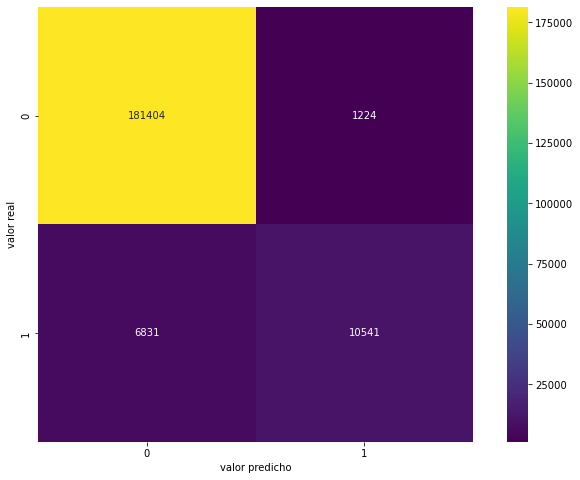

In [7]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [8]:
# separamos los datos en X e y

X2 = df_balanceo.drop("fraud", axis = 1)
y2 = df_balanceo["fraud"]

In [9]:
df_balanceo.isnull().sum()

fraud                             0
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

In [10]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [11]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

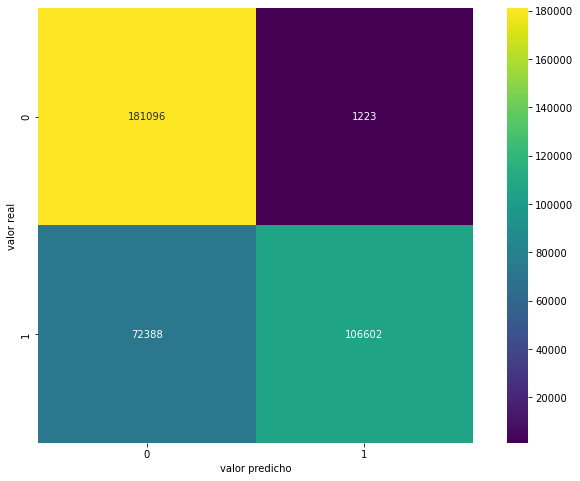

In [12]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y SIN ESTANDARIZAR

mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

Calculad las métricas para vuestro modelo

Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [13]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [17]:
#Este modelo solo tiene estandarización de las variables con RobustScaler
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.959725,0.895963,0.606781,0.723547,0.702693,test,Regresión logistica Esta
1,0.958464,0.891911,0.597978,0.715950,0.694482,train,Regresión logistica Esta


In [21]:
#Este modelo tiene aplicado el SMOTETomek
results_logistic = metricas(y_test2, y_pred_test, y_train2, y_pred_train, "Regresión logistica balanceado")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.796266,0.988658,0.595575,0.743350,0.591012,test,Regresión logistica balanceado
1,0.796706,0.988291,0.596140,0.743686,0.591676,train,Regresión logistica balanceado


In [22]:
resultados_todo = pd.concat([results_logistic, results_logistic_esta], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.796266,0.988658,0.595575,0.743350,0.591012,test,Regresión logistica balanceado
1,0.796706,0.988291,0.596140,0.743686,0.591676,train,Regresión logistica balanceado
0,0.959725,0.895963,0.606781,0.723547,0.702693,test,Regresión logistica Esta
1,0.958464,0.891911,0.597978,0.715950,0.694482,train,Regresión logistica Esta


Anáisis de resultados:

En el caso del balanceado, viendo el valor de kappa no podemos descartar que esté acertando por azar, así que, descartaríamos el modelo.

En el caso del modelo solo estandarizado, el valor del kappa del train llega casi al 0.7. En este caso revisamos el resto de valores. 
En nuestro modelo nos interesa minimizar los FN, es decir, casos reales de fraude en los que el modelo nos está diciendo que no es fraude, por lo tanto, nos fijamos a continuación en el recall, que no nos parece en principio un buen dato. 